# Problem Statement

The process of classifying words into their parts of speech and labeling them according to their grammatical categories. These tags are then used to build relationships and connections between words in the NetworkX graph.

# This is the text that we will perform the task on it...

In [1]:
arabic_text = """
تأسست شركة CyShield في عام 2016، وهي شركة رائدة في مجال الخدمات الرقمية،
متخصصة في الذكاء الاصطناعي، الأمن السيبراني، علم البيانات، إنترنت الأشياء والهندسة البرمجية.
تعمل CyShield مع شركات كبيرة تشمل المؤسسات المالية والإعلامية والرعاية الصحية والحكومية.
"""

# 1- POS Tagging

##  Rule-Based Methods

Why?: Quick to implement, spaCy and Stanza come with pre-trained POS taggers, and you can use them to tag words with very little setup.

### Spacy

there is no `Arabic` model in [spacy](https://spacy.io/usage/models), so we will use `spacy-udpipe` which is a bridge library that integrates `UDPipe` models into the spaCy pipeline. This allows users to utilize UDPipe's capabilities (that has an Arabic model) within the familiar spaCy interface.

In [2]:
!pip install spacy-udpipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.8/936.8 kB 18.2 MB/s eta 0:00:00


Downloading the pre-trained UDPipe model for Arabic.
This model includes the necessary data for tokenization, POS tagging, lemmatization, and dependency parsing based on [Universal Dependencies](https://universaldependencies.org/).

In [3]:
import spacy_udpipe

spacy_udpipe.download("ar")
spacy_nlp = spacy_udpipe.load("ar")

Downloaded pre-trained UDPipe model for 'ar' language


Note: It does the `tokenization` internally

In [4]:
%%time
import spacy

spacy_doc = spacy_nlp(arabic_text)
for token in spacy_doc:
    print(f'{token.text} => {token.pos_} ({spacy.explain(token.pos_)})')

تأسست => VERB (verb)
شركة => NOUN (noun)
CySh => X (other)
ield => X (other)
في => ADP (adposition)
عام => NOUN (noun)
2016 => NUM (numeral)
، => PUNCT (punctuation)
و => CCONJ (coordinating conjunction)
هي => PRON (pronoun)
شركة => NOUN (noun)
رائدة => X (other)
في => ADP (adposition)
مجال => NOUN (noun)
الخدمات => NOUN (noun)
الرقمية => ADJ (adjective)
، => PUNCT (punctuation)
متخصصة => ADJ (adjective)
في => ADP (adposition)
الذكاء => NOUN (noun)
الاصطناعي => ADJ (adjective)
، => PUNCT (punctuation)
الأمن => NOUN (noun)
السيبراني => ADJ (adjective)
، => PUNCT (punctuation)
علم => NOUN (noun)
البيانات => NOUN (noun)
، => PUNCT (punctuation)
إنترنت => X (other)
الأشياء => NOUN (noun)
والهندسة => X (other)
البرمجية => ADJ (adjective)
. => PUNCT (punctuation)
تعمل => VERB (verb)
CySh => X (other)
ield => X (other)
مع => ADP (adposition)
شركات => NOUN (noun)
كبيرة => ADJ (adjective)
تشمل => VERB (verb)
المؤسسات => NOUN (noun)
المالية => ADJ (adjective)
والإعلامية => X (other)
و => CCONJ (

we will use spaCy’s built-in [displaCy visualizer](https://spacy.io/usage/visualizers)

Note: The `style="dep"` visualizes the dependency parse, which inherently shows POS tags as part of the visualization.

In [6]:
from spacy import displacy

displacy.render(spacy_doc, style="dep", jupyter=True)

**We can see that it made some mistakes like:**
- Didn't tokenize or classify the English name `Cyshiled` right
- Miss-classified some Arbic words

=> to solve the first we can use a [Multilingual](https://spacy.io/models/xx) models but they are only for NER.

=> so let's try another liberay...

### Stanza

formerly known as StanfordNLP, is a Python library developed by Stanford that provides state-of-the-art pre-trained models for a variety of natural language processing tasks, including POS tagging. Stanza is known for its easy integration and high-quality linguistic annotations.

In [7]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 28.3 MB/s eta 0:00:00


In [8]:
import stanza
print(stanza.__version__)

stanza.download('ar')

# Initialize the stanza Arabic pipeline for POS tagging
stanza_nlp = stanza.Pipeline("ar", processors="tokenize,pos")

1.9.2


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ar (Arabic) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ar/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package     |
---------------------------
| tokenize  | padt        |
| mwt       | padt        |
| pos       | padt_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are ex

In [9]:
%%time
doc = stanza_nlp(arabic_text)

# Extract words and their POS tags
stanza_pos_tags = [(word.text, word.upos) for sent in doc.sentences for word in sent.words]

CPU times: user 784 ms, sys: 22.4 ms, total: 807 ms
Wall time: 1.13 s


In [10]:
stanza_pos_tags

[('تأسست', 'VERB'),
 ('شركة', 'NOUN'),
 ('CyShiel', 'X'),
 ('d', 'X'),
 ('في', 'ADP'),
 ('عام', 'NOUN'),
 ('2016', 'NUM'),
 ('،', 'PUNCT'),
 ('و', 'CCONJ'),
 ('هي', 'PRON'),
 ('شركة', 'NOUN'),
 ('رائدة', 'ADJ'),
 ('في', 'ADP'),
 ('مجال', 'NOUN'),
 ('الخدمات', 'NOUN'),
 ('الرقمية', 'ADJ'),
 ('،', 'PUNCT'),
 ('متخصصة', 'ADJ'),
 ('في', 'ADP'),
 ('الذكاء', 'NOUN'),
 ('الاصطناعي', 'ADJ'),
 ('،', 'PUNCT'),
 ('الأمن', 'NOUN'),
 ('السيبراني', 'ADJ'),
 ('،', 'PUNCT'),
 ('علم', 'NOUN'),
 ('البيانات', 'NOUN'),
 ('،', 'PUNCT'),
 ('إنترنت', 'NOUN'),
 ('الأشياء', 'NOUN'),
 ('و', 'CCONJ'),
 ('الهندسة', 'NOUN'),
 ('البرمجية', 'ADJ'),
 ('.', 'PUNCT'),
 ('تعمل', 'VERB'),
 ('CyShiel', 'X'),
 ('d', 'X'),
 ('مع', 'ADP'),
 ('شركات', 'NOUN'),
 ('كبيرة', 'ADJ'),
 ('تشمل', 'VERB'),
 ('المؤسسات', 'NOUN'),
 ('المالية', 'ADJ'),
 ('و', 'CCONJ'),
 ('الإعلامية', 'ADJ'),
 ('و', 'CCONJ'),
 ('الرعاية', 'NOUN'),
 ('الصحية', 'ADJ'),
 ('و', 'CCONJ'),
 ('الحكومية', 'ADJ'),
 ('.', 'PUNCT')]

**We can see it is pretty good but still can't handle the English name**

=> We can use another on-the-shelf library like `NLTK` but it doesn't have an Arabic model for POS tagginga also.

=> So let's go beyond that for stronger methods which is the `Transformers`

## Deep Learning-Based Methods

you can find the checkpoint [here](https://huggingface.co/CAMeL-Lab/bert-base-arabic-camelbert-mix-pos-msa)

In [11]:
from transformers import pipeline

# Initialize a POS tagging pipeline using a transformer model
pos_pipeline = pipeline("token-classification", model="CAMeL-Lab/bert-base-arabic-camelbert-mix-pos-msa", aggregation_strategy="simple")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-mix-pos-msa were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you ar

In [12]:
%%time

bert_pos_tags = pos_pipeline(arabic_text)
bert_pos_tags

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


CPU times: user 423 ms, sys: 8.47 ms, total: 431 ms
Wall time: 1.04 s


[{'entity_group': 'verb',
  'score': 0.9999372,
  'word': 'تأسست',
  'start': 1,
  'end': 6},
 {'entity_group': 'noun',
  'score': 0.99998116,
  'word': 'شركة',
  'start': 7,
  'end': 11},
 {'entity_group': 'noun_prop',
  'score': 0.9951635,
  'word': 'CyShield',
  'start': 12,
  'end': 20},
 {'entity_group': 'prep',
  'score': 0.999979,
  'word': 'في',
  'start': 21,
  'end': 23},
 {'entity_group': 'noun',
  'score': 0.9999807,
  'word': 'عام',
  'start': 24,
  'end': 27},
 {'entity_group': 'digit',
  'score': 0.9986914,
  'word': '2016',
  'start': 28,
  'end': 32},
 {'entity_group': 'punc',
  'score': 0.999961,
  'word': '،',
  'start': 32,
  'end': 33},
 {'entity_group': 'pron',
  'score': 0.9999045,
  'word': 'وهي',
  'start': 34,
  'end': 37},
 {'entity_group': 'noun',
  'score': 0.9999802,
  'word': 'شركة',
  'start': 38,
  'end': 42},
 {'entity_group': 'adj',
  'score': 0.99982494,
  'word': 'رائدة',
  'start': 43,
  'end': 48},
 {'entity_group': 'prep',
  'score': 0.9999745,
 

In [13]:
def convert_transformer_output_to_tuples(model_output):
    result_list = []
    for item in model_output:
        word = item['word']
        label = item['entity_group']
        result_list.append((word, label))

    return result_list

In [14]:
# Convert model output
converted_output  = convert_transformer_output_to_tuples(bert_pos_tags)
converted_output

[('تأسست', 'verb'),
 ('شركة', 'noun'),
 ('CyShield', 'noun_prop'),
 ('في', 'prep'),
 ('عام', 'noun'),
 ('2016', 'digit'),
 ('،', 'punc'),
 ('وهي', 'pron'),
 ('شركة', 'noun'),
 ('رائدة', 'adj'),
 ('في', 'prep'),
 ('مجال الخدمات', 'noun'),
 ('الرقمية', 'adj'),
 ('،', 'punc'),
 ('متخصصة', 'adj'),
 ('في', 'prep'),
 ('الذكاء', 'noun'),
 ('الاصطناعي', 'adj'),
 ('،', 'punc'),
 ('الأمن', 'noun'),
 ('السيبراني', 'adj'),
 ('،', 'punc'),
 ('علم البيانات', 'noun'),
 ('،', 'punc'),
 ('إنترنت', 'noun_prop'),
 ('الأشياء والهندسة', 'noun'),
 ('البرمجية', 'adj'),
 ('.', 'punc'),
 ('تعمل', 'verb'),
 ('CyShield', 'noun_prop'),
 ('مع شركات', 'noun'),
 ('كبيرة', 'adj'),
 ('تشمل', 'verb'),
 ('المؤسسات', 'noun'),
 ('المالية والإعلامية', 'adj'),
 ('والرعاية', 'noun'),
 ('الصحية والحكومية', 'adj'),
 ('.', 'punc')]

# 2- Network Graph Construction

After tagging the words, we can build a graph using NetworkX:

- Nodes: Each word and its POS tag in the document is represented as a node.

- Edges: Edges can represent different types of relationships:

    - Sequential relationships: Each word is connected to the next word in the sentence.
    - Syntactic dependencies: You can create edges based on syntactic relationships (e.g., subject-verb-object), which spaCy can extract via dependency parsing.

In [15]:
# for a good representation of Arabic text
!pip install arabic-reshaper python-bidi

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [17]:
def draw_graph(graph):
    plt.figure(figsize=(20, 10))

    pos = nx.spring_layout(graph)

    # Increase the distance between nodes
    pos = {node: (x, y + 2) for node, (x, y) in pos.items()}

    labels = nx.get_node_attributes(graph, 'pos_tag')

    # Modify node labels to handle Arabic text
    node_labels = {node: f"{get_display(arabic_reshaper.reshape(str(node[0])))}\n({labels.get(node, node[1])})" for node in graph.nodes()}

    nx.draw(graph, pos, with_labels=True, labels=node_labels, font_size=15, node_color='lightblue', edge_color='gray', width=1, alpha=0.7, node_size=1500)
    plt.title("Arabic Part-Of-Speech with NetworkX", fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.show()

**Sequential relationships**

In [18]:
def create_graph(pos_tags):
    Graph = nx.Graph()

    # Add nodes for each unique POS tag
    unique_pos = set(pos_tags)
    for pos in unique_pos:
        Graph.add_node(pos)

    # Add edges between adjacent POS tags
    for i in range(len(pos_tags)-1):
        Graph.add_edge(pos_tags[i], pos_tags[i+1])


    return Graph

**Visualize the Network Graph**

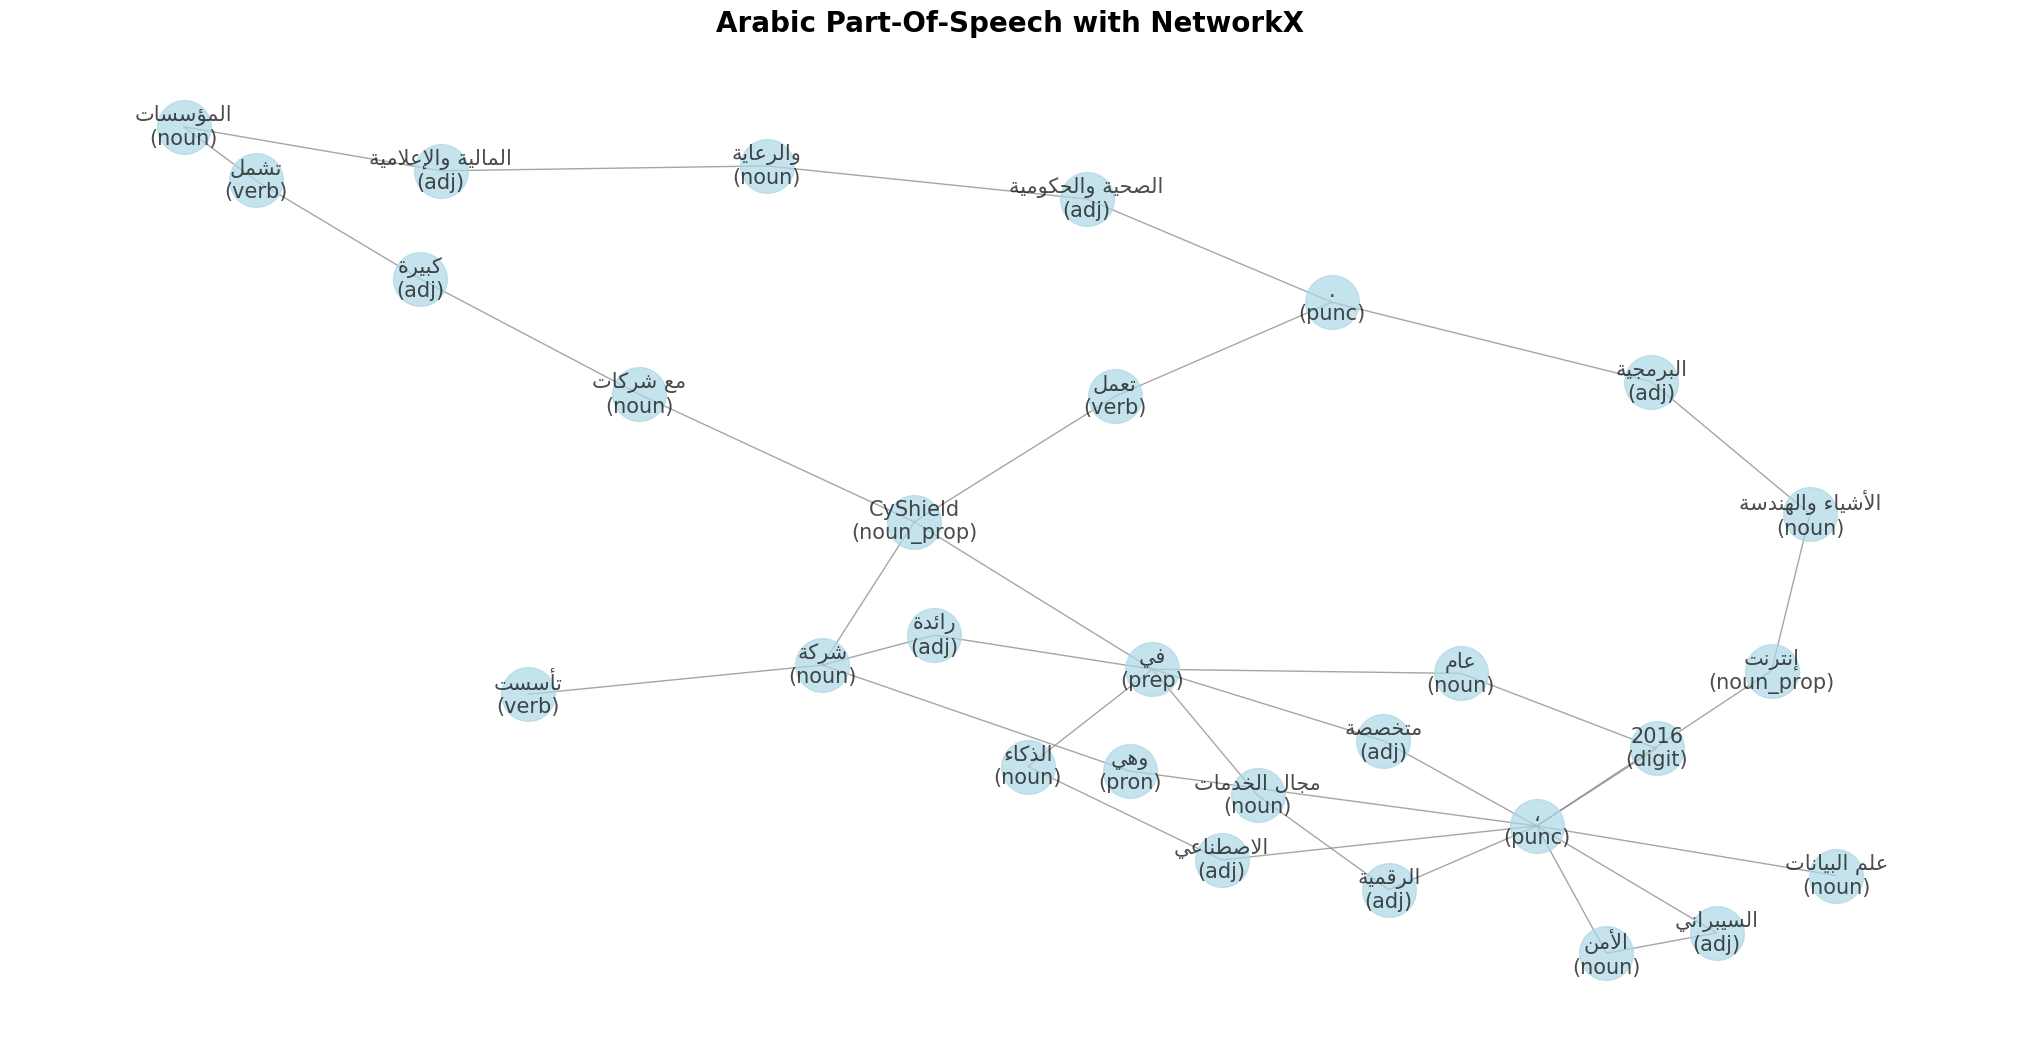

In [19]:
# Create and draw the graph
graph = create_graph(converted_output)
draw_graph(graph)

**Syntactic dependencies**

In [20]:
def create_graph_with_spacy(doc):

    Graph = nx.Graph()

    # Add nodes for each token
    for token in doc:
        Graph.add_node((token.text, token.pos_), pos_tag=token.pos_)

    # Add edges for sequential relationships (as before)
    for i in range(len(doc) - 1):
        Graph.add_edge((doc[i].text, doc[i].pos_), (doc[i+1].text, doc[i+1].pos_), relationship='sequential')

    # Add edges for syntactic dependencies (subject-verb-object, etc.)
    for token in doc:
        # Check if the token has a head (parent in syntactic tree)
        if token.dep_ != 'ROOT':
            head = token.head
            Graph.add_edge((token.text, token.pos_), (head.text, head.pos_), relationship=token.dep_)

    return Graph

**Visualize the Network Graph**

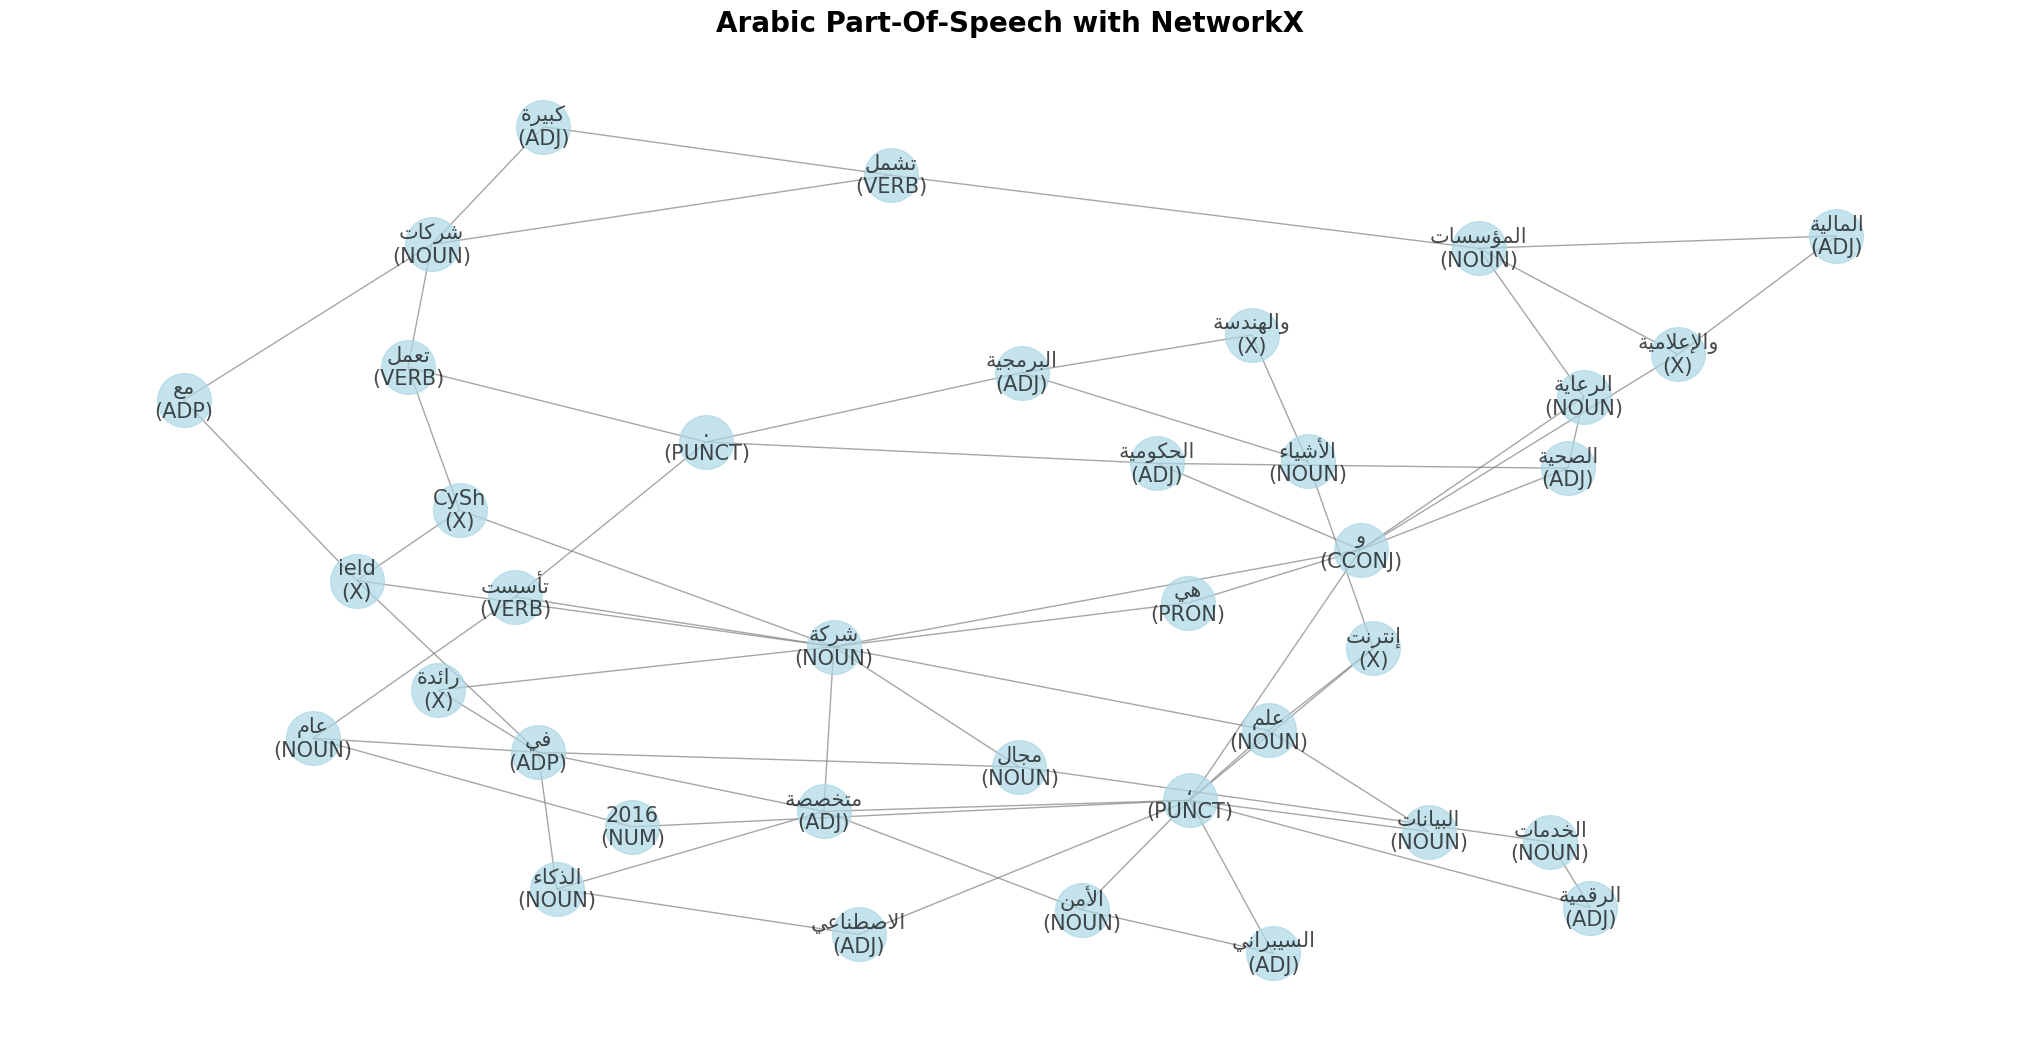

In [21]:
# Create and draw the graph
graph = create_graph_with_spacy(spacy_doc)
draw_graph(graph)

# 3- Optimization Techniques

We can use `parallel` from the **fast core** to do parallelization for handling multiple documents concurrently.

In [22]:
from fastcore.parallel import parallel

In [28]:
docs = ['مع انتشار الكاميرات وأنظمة المراقبة (CCTV)، أصبحت تقنيات الرؤية الحاسوبية لا غنى عنها لاستخراج المعلومات من البيانات البصرية. في Cyshield، نقوم ببناء نماذج تعلم عميق متطورة للكشف عن وتحديد أي معلومات ذات صلة من الصور ومقاطع الفيديو.',
        'تقدم Cyshield حلول معالجة اللغات الطبيعية (NLP) المتطورة بلغات متعددة للعديد من التطبيقات مثل روبوتات المحادثة، الترجمة الآلية، تحليل المشاعر، تلخيص النصوص، واستخراج الكلمات الرئيسية.',
        'رقمنة أرشيف الوثائق خطوة هامة في التحول الرقمي للمؤسسات الحديثة. تقدم Cyshield حلول التعرف الضوئي على الحروف (OCR) بلغات متعددة لتحويل مستنداتك إلى تنسيق رقمي.']

In [43]:
def process_docs(text):
  bert_pos_tags = pos_pipeline(text)
  converted_output  = convert_transformer_output_to_tuples(bert_pos_tags)
  graph = create_graph(converted_output)
  return graph

In [44]:
graphs = parallel(process_docs, docs, n_workers=3)

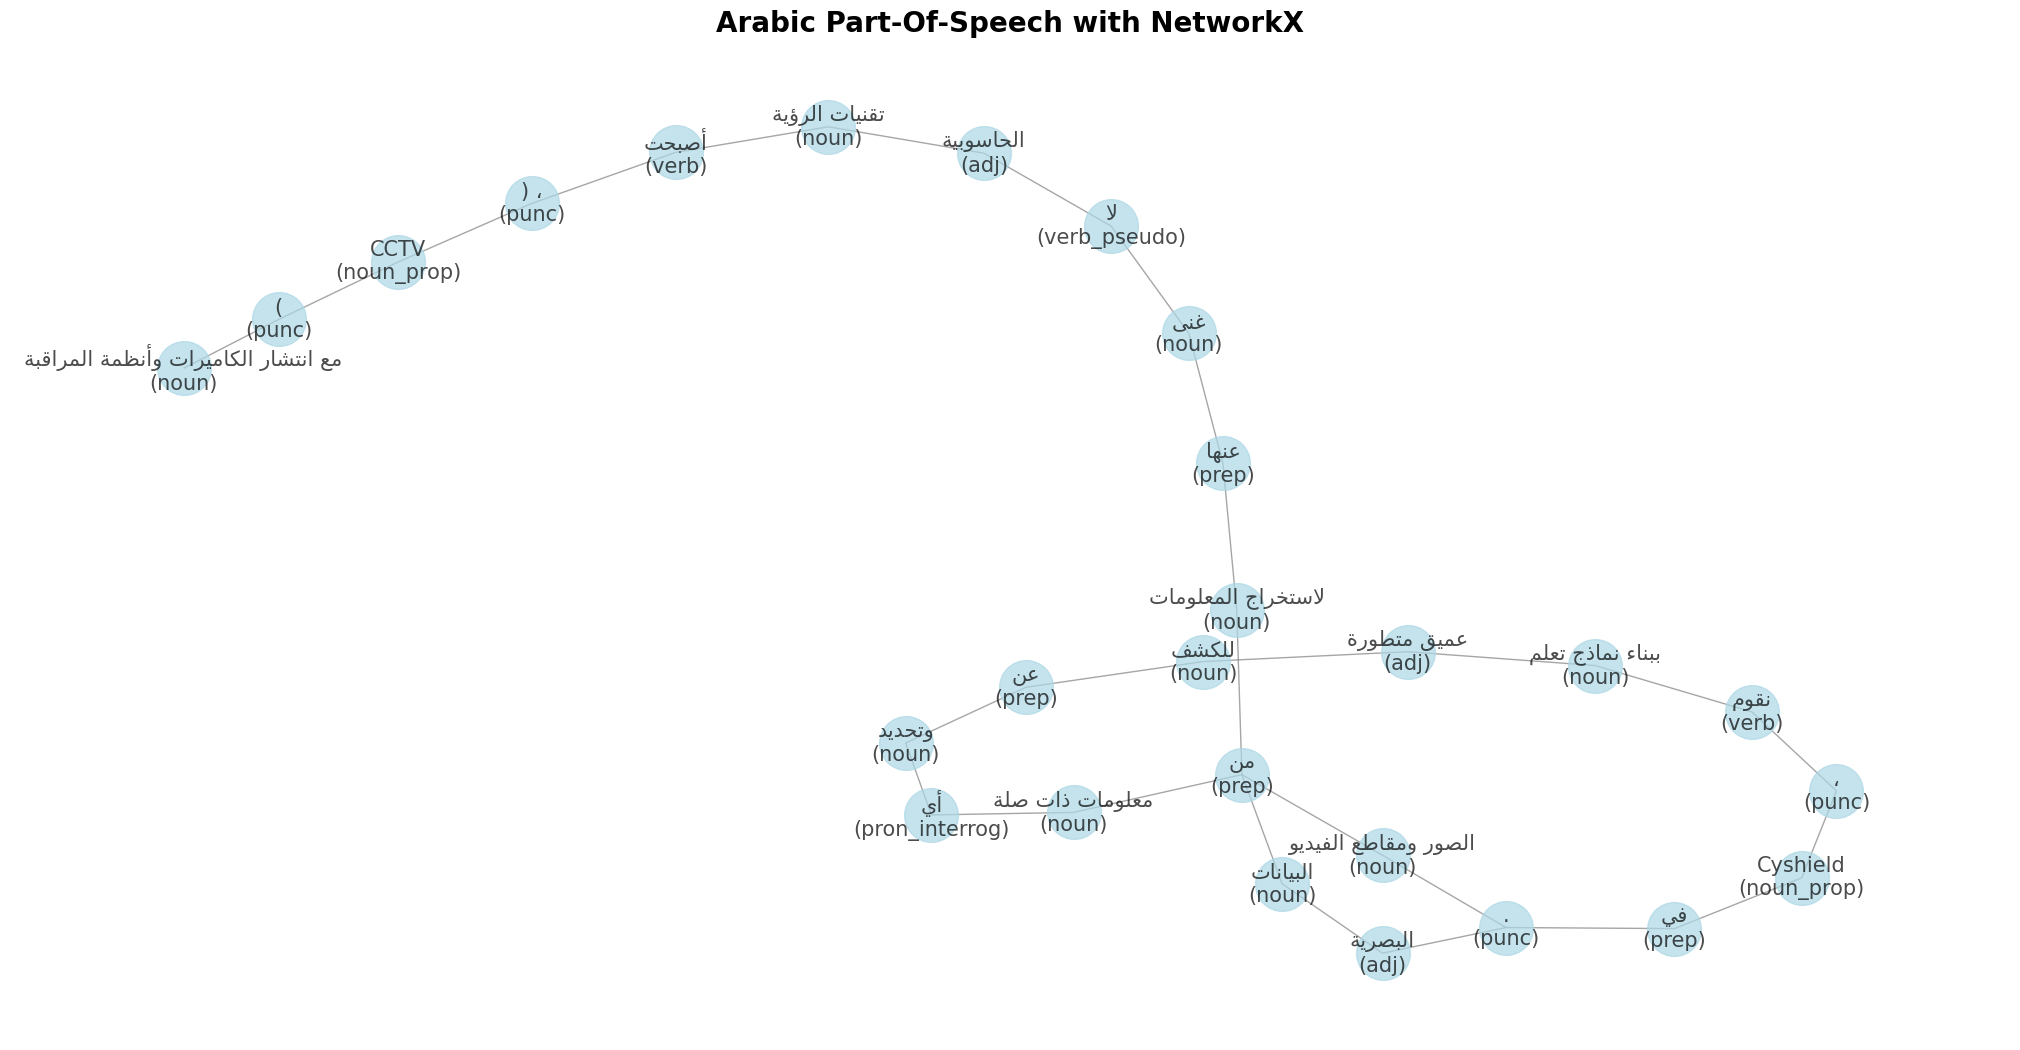

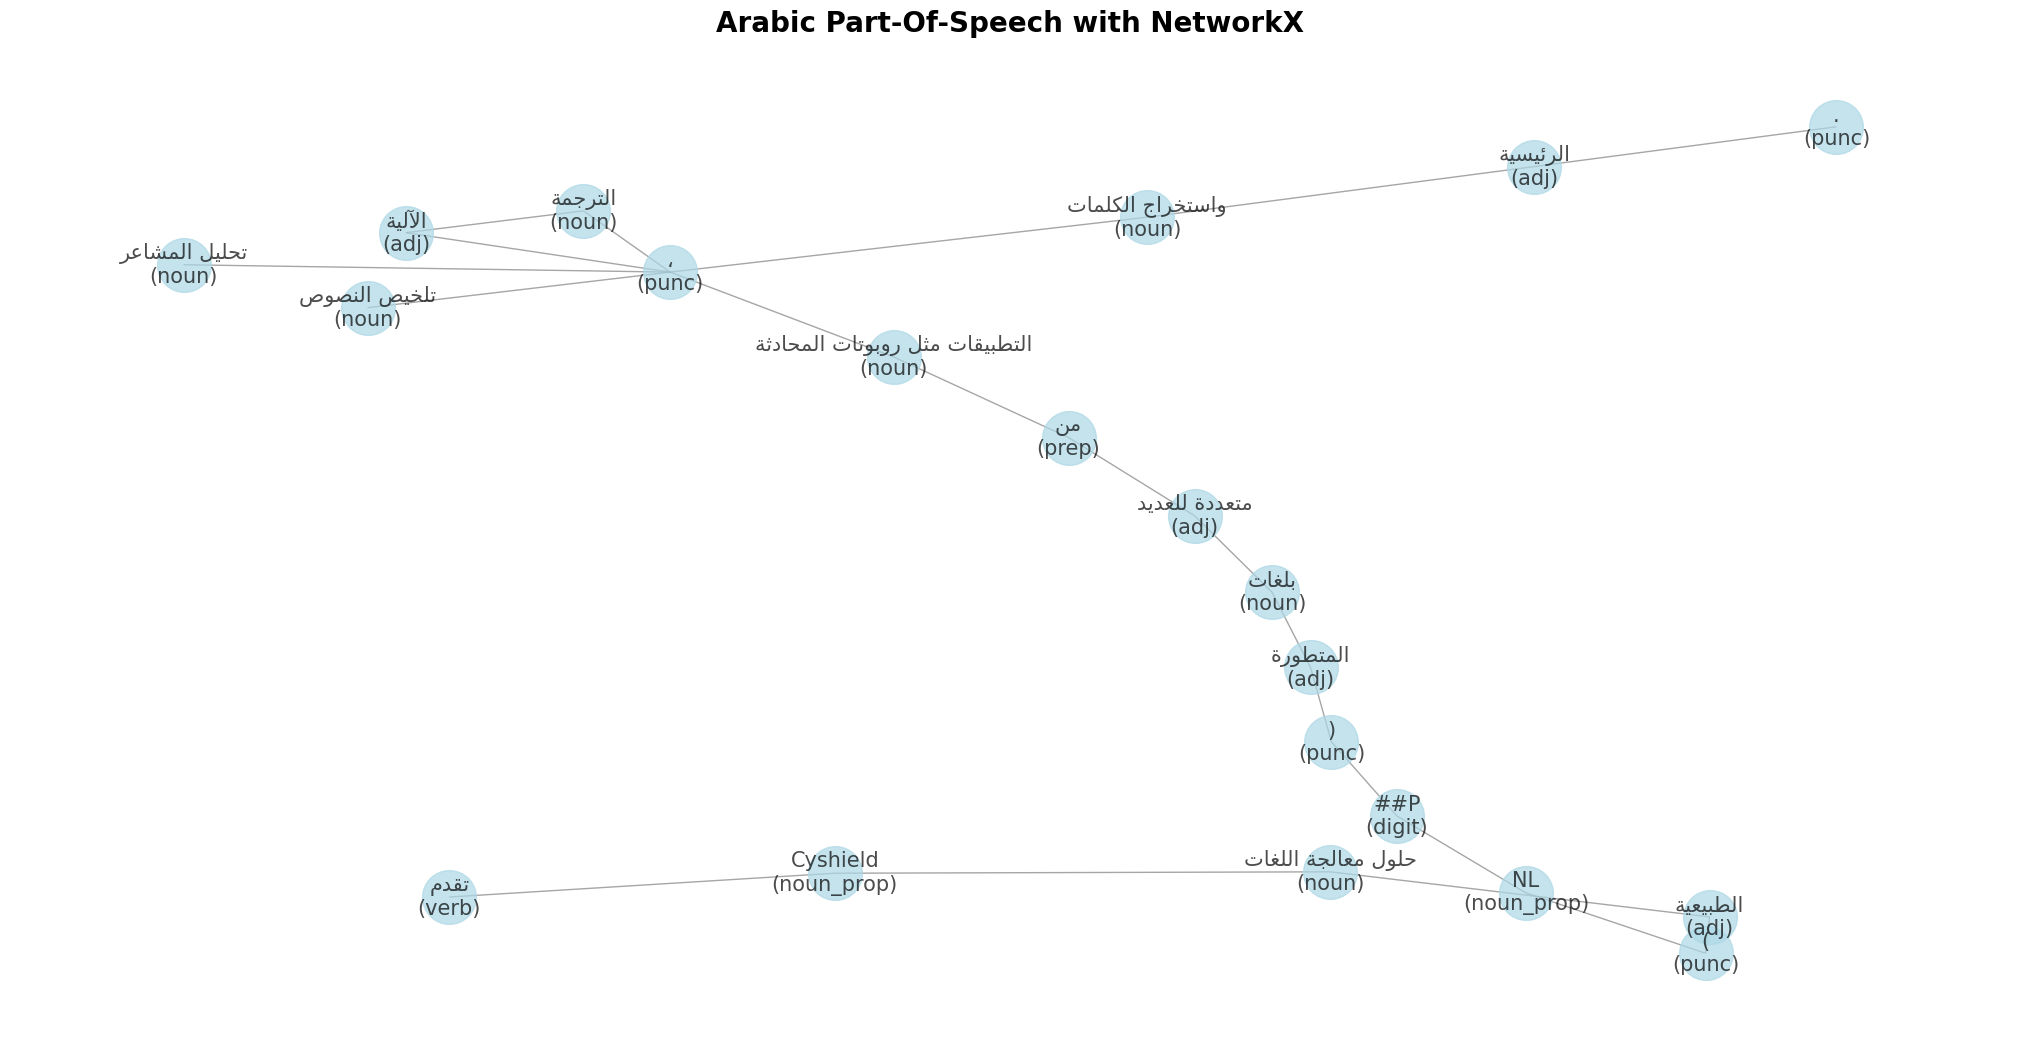

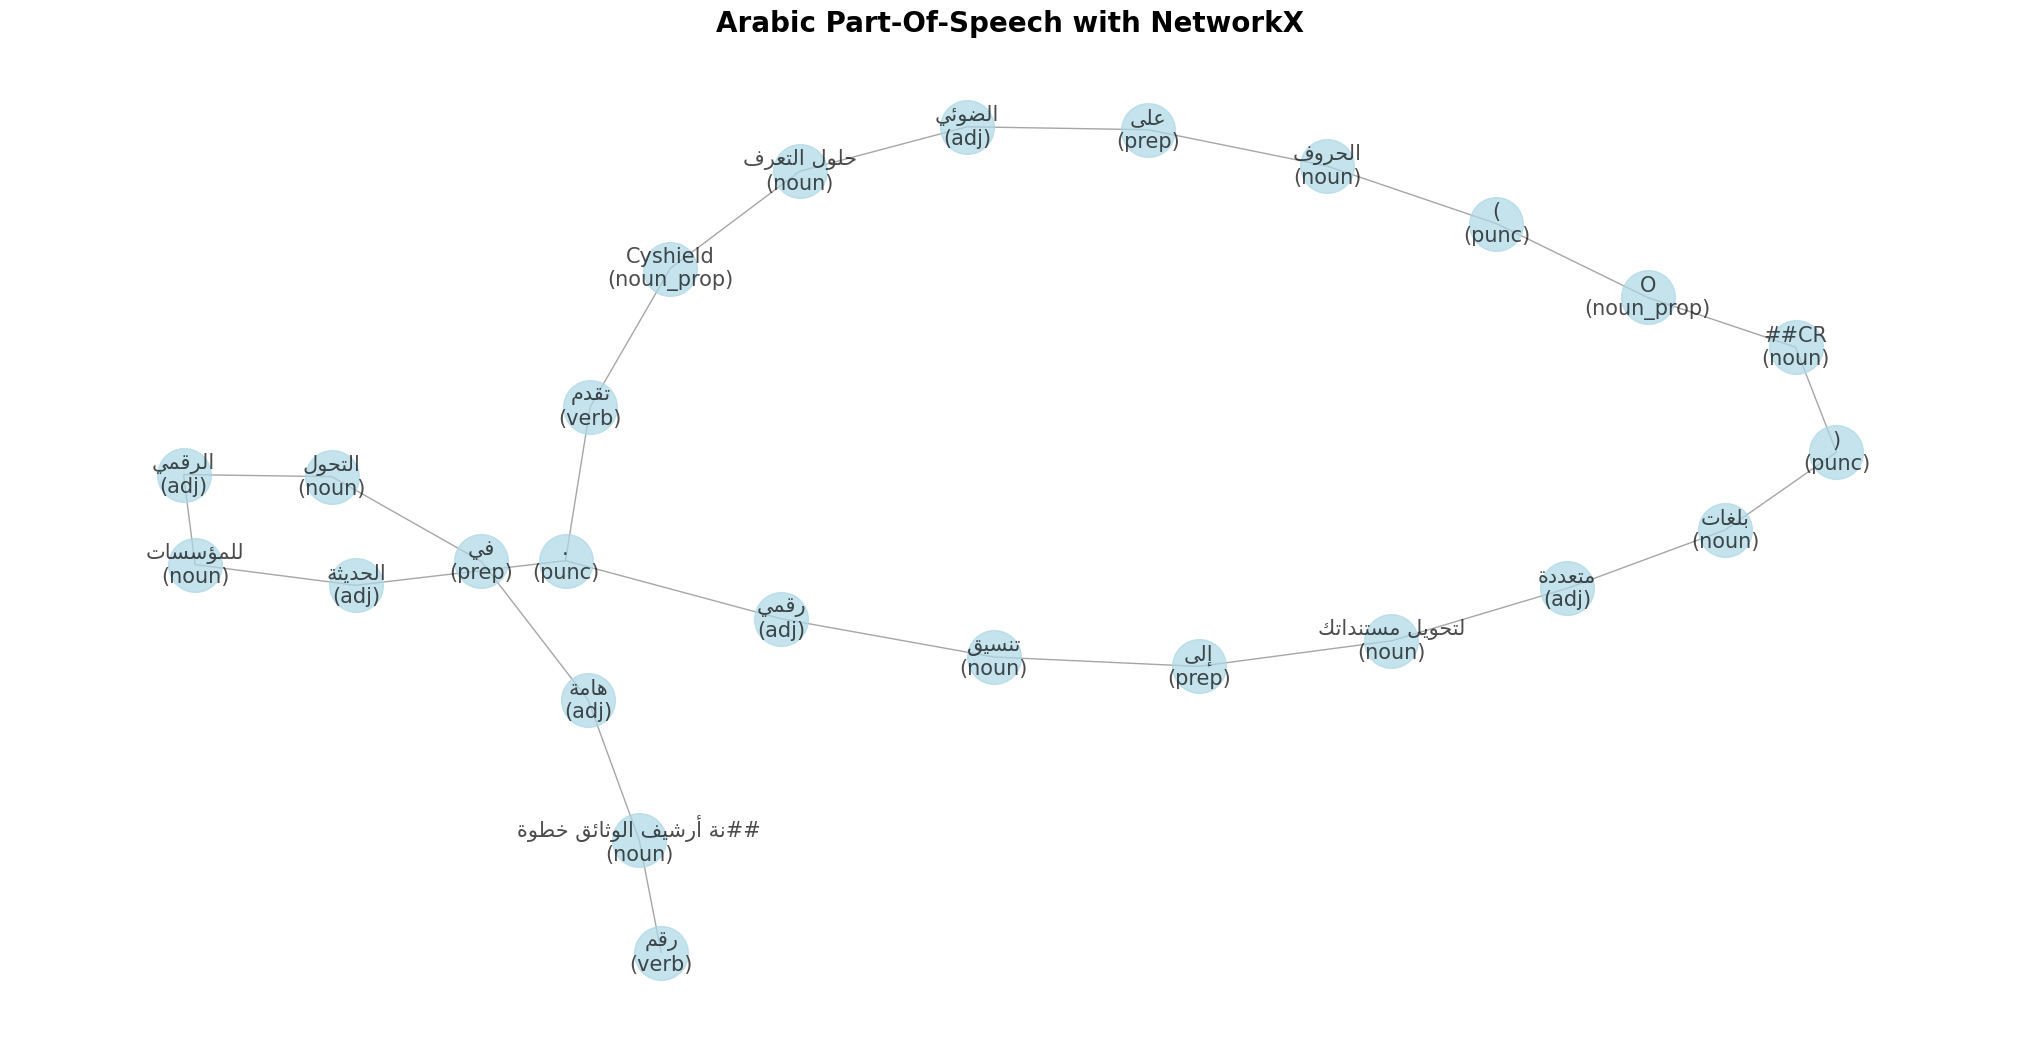

In [45]:
for graph in graphs:
    draw_graph(graph)

# 4- Comparison and Evaluation

we will use the [seqeval](https://github.com/chakki-works/seqeval) library to calculate accuracy, precision, recall, and F1-score, which are commonly used metrics for sequence labeling tasks like NER and POS.

In [26]:
# Install seqeval if you haven't already
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=0f652366c52cbc8b5e3a71e8fa1cc3118c618dd243fee3fb8a0b854fe270f3b2
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


**there are differences in the tokenization and class names between Stanza and fine-tuned Bert but with manual mapping, we can make the evaluation...**

In [49]:
from seqeval.metrics import classification_report, f1_score

# Ground truth for the arabic text with part of speech tags
pos_true = [
    ['VERB', 'NOUN', 'PROPN', 'ADP', 'NOUN', 'NUM', 'PUNCT', 'CCONJ', 'PRON', 'NOUN',
     'ADJ', 'ADP', 'NOUN', 'NOUN', 'ADJ', 'PUNCT', 'ADJ', 'ADP', 'NOUN', 'ADJ', 'PUNCT',
     'NOUN', 'ADJ', 'PUNCT', 'NOUN', 'NOUN', 'PUNCT', 'NOUN', 'NOUN', 'CCONJ', 'NOUN', 'ADJ',
     'PUNCT', 'VERB', 'PROPN', 'ADP', 'NOUN', 'ADJ', 'VERB', 'NOUN', 'ADJ', 'CCONJ', 'ADJ',
     'CCONJ', 'NOUN', 'ADJ', 'CCONJ', 'ADJ', 'PUNCT']
]

# Predictions from the stanza model
stanza_pred = [
    ['VERB', 'NOUN', 'X', 'ADP', 'NOUN', 'NUM', 'PUNCT', 'CCONJ', 'PRON', 'NOUN',
     'ADJ', 'ADP', 'NOUN', 'NOUN', 'ADJ', 'PUNCT', 'ADJ', 'ADP', 'NOUN', 'ADJ', 'PUNCT',
     'NOUN', 'ADJ', 'PUNCT', 'NOUN', 'NOUN', 'PUNCT', 'NOUN', 'NOUN', 'CCONJ', 'NOUN', 'ADJ',
     'PUNCT', 'VERB', 'X', 'ADP', 'NOUN', 'ADJ', 'VERB', 'NOUN', 'ADJ', 'CCONJ', 'ADJ',
     'CCONJ', 'NOUN', 'ADJ', 'CCONJ', 'ADJ', 'PUNCT']
]

# Predictions from the transformer model
bert_pred = [
    ['VERB', 'NOUN', 'PROPN', 'ADP', 'NOUN', 'NUM', 'PUNCT', 'CCONJ', 'PRON', 'NOUN',
     'ADJ', 'ADP', 'NOUN', 'NOUN', 'ADJ', 'PUNCT', 'ADJ', 'ADP', 'NOUN', 'ADJ', 'PUNCT',
     'NOUN', 'ADJ', 'PUNCT', 'NOUN', 'NOUN', 'PUNCT', 'NOUN', 'NOUN', 'CCONJ', 'NOUN', 'ADJ',
     'PUNCT', 'VERB', 'PROPN', 'ADP', 'NOUN', 'ADJ', 'VERB', 'NOUN', 'ADJ', 'CCONJ', 'ADJ',
     'CCONJ', 'NOUN', 'ADJ', 'CCONJ', 'ADJ', 'PUNCT']
]

# Calculating f1 score for both predictions
Stanza_f1 = f1_score(pos_true, stanza_pred)
Bert_f1 = f1_score(pos_true, bert_pred)

# Getting classification reports for both predictions
Stanza_report = classification_report(pos_true, stanza_pred)
Bert_report = classification_report(pos_true, bert_pred)

print("F1 Score for Stanza: ", Stanza_f1)
print("Classification Report for Stanza: \n", Stanza_report)
print("\nF1 Score for Bert: ", Bert_f1)
print("Classification Report for Bert: \n", Bert_report)


F1 Score for Stanza:  0.9565217391304348
Classification Report for Stanza: 
               precision    recall  f1-score   support

        CONJ       1.00      1.00      1.00         5
          DJ       1.00      1.00      1.00        11
          DP       1.00      1.00      1.00         4
         ERB       1.00      1.00      1.00         3
         OUN       1.00      1.00      1.00        12
         RON       1.00      1.00      1.00         1
        ROPN       0.00      0.00      0.00         2
          UM       1.00      1.00      1.00         1
        UNCT       1.00      1.00      1.00         7
           _       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.96      0.96      0.96        46


F1 Score for Bert:  1.0
Classification Report for Bert: 
               precision    recall  f1-score   support

        CONJ       1.00      1.00      1.00       